In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [3]:
data=pd.read_csv('/Users/Albert3/Downloads/alldata.csv')
df=data[['Drug Name','Cell Line Name','Tissue','Tissue Sub-type','IC50']]
df

,Drug Name,Cell Line Name,Tissue,Tissue Sub-type,IC50
0,Camptothecin,TE-5,aero_digestive_tract,oesophagus,-2.555311
1,Camptothecin,EC-GI-10,aero_digestive_tract,oesophagus,-3.125664
2,Camptothecin,HCE-4,aero_digestive_tract,oesophagus,-3.536140
3,Camptothecin,KYSE-140,aero_digestive_tract,oesophagus,-0.402974
4,Camptothecin,KYSE-410,aero_digestive_tract,oesophagus,0.605862
...,...,...,...,...,...
90996,N-acetyl cysteine,FU97,digestive_system,stomach,10.541691
90997,N-acetyl cysteine,NUGC-4,digestive_system,stomach,9.745149
90998,N-acetyl cysteine,OCUM-1,digestive_system,stomach,10.959875
90999,N-acetyl cysteine,HSC-39,digestive_system,stomach,8.342217


In [5]:
encoder = LabelEncoder()
dframe=pd.DataFrame()
dframe["Drug Name"] = encoder.fit_transform(df["Drug Name"])
dframe["Cell Line Name"] = encoder.fit_transform(df["Cell Line Name"])
dframe["Tissue"] = encoder.fit_transform(df["Tissue"])
dframe["Tissue Sub-type"] = encoder.fit_transform(df["Tissue Sub-type"])
dframe['IC50']=df['IC50']
dframe

,Drug Name,Cell Line Name,Tissue,Tissue Sub-type,IC50
0,73,853,0,42,-2.555311
1,73,164,0,42,-3.125664
2,73,253,0,42,-3.536140
3,73,379,0,42,-0.402974
4,73,384,0,42,0.605862
...,...,...,...,...,...
90996,174,203,4,50,10.541691
90997,174,631,4,50,9.745149
90998,174,644,4,50,10.959875
90999,174,273,4,50,8.342217


In [6]:
# get the correlation matrix
dframe.corr()

,Drug Name,Cell Line Name,Tissue,Tissue Sub-type,IC50
Drug Name,1.000000,0.001494,0.016186,0.003248,0.032587
Cell Line Name,0.001494,1.000000,0.021434,0.237142,0.026803
Tissue,0.016186,0.021434,1.000000,-0.027549,0.022697
Tissue Sub-type,0.003248,0.237142,-0.027549,1.000000,-0.025047
IC50,0.032587,0.026803,0.022697,-0.025047,1.000000


<AxesSubplot:ylabel='Frequency'>

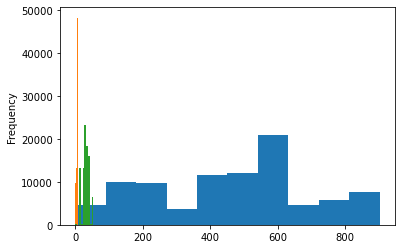

In [7]:
#plot histogram for the data
dframe['Cell Line Name'].plot(kind='hist')
dframe['Tissue'].plot(kind='hist')
dframe['Tissue Sub-type'].plot(kind='hist')

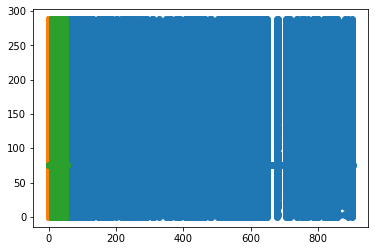

In [10]:
#plot a scatter plot
import matplotlib.pyplot as plt
plt.scatter(x=dframe['Cell Line Name'],y=dframe['Drug Name'])
plt.scatter(x=dframe['Tissue'],y=dframe['Drug Name'])
plt.scatter(x=dframe['Tissue Sub-type'],y=dframe['Drug Name'])
#plt.scatter(x=dframe['Cell Line Name'],y=dframe['Drug Name'])

In [11]:
#X and Y
X=dframe[['Cell Line Name','Tissue','Tissue Sub-type','IC50']]
Y=dframe[['Drug Name']]

In [12]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.69345217, -2.30592897,  1.16613602, -2.07469148],
       [-1.32157697, -2.30592897,  1.16613602, -2.28448591],
       [-0.93211747, -2.30592897,  1.16613602, -2.4354723 ],
       ...,
       [ 0.77887875, -0.25873143,  1.92319793,  2.89663228],
       [-0.84459848, -0.25873143,  1.92319793,  1.93377265],
       [ 1.27336103, -0.25873143,  1.92319793,  2.61429184]])

In [13]:
#Split the dataset
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size = 0.1, random_state = 24)
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (81900, 4), (81900, 1)
Test: (9101, 4), (9101, 1)


In [14]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X, Y)

/var/folders/d9/f8xx3ggn7y5f7tr2jyd4nkk80000gp/T/ipykernel_8576/638098497.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X, Y)


RandomForestClassifier(random_state=18)

In [15]:
preds = rf_model.predict(X_test)
preds

array([233, 244, 166, ..., 172, 268, 270])

In [16]:
#predict a specific value
scaled_x=scaler.transform([[203,4,50,10.541691]])
scaled_x

/Users/Albert3/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.15091494, -0.25873143,  1.92319793,  2.74281057]])

In [17]:
predicted=rf_model.predict([scaled_x[0]])

In [18]:
predicted

array([174])

In [19]:
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

Accuracy on train data by Random Forest Classifier: 99.52014652014653


In [20]:
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

Accuracy on test data by Random Forest Classifier: 99.5934512690913


In [25]:
`          tframe=df.join(dframe,rsuffix='enc')
tframe

SyntaxError: ignored

In [23]:
#predict actual values
cln='EC-GI-10'
tis='aero_digestive_tract'
subt='oesophagus'
i50=-3.125664
test=pd.DataFrame()
test['clnenc']=tframe['Cell Line Nameenc'].where((tframe['Cell Line Name']==cln))
test['tis']=tframe['Tissueenc'].where((tframe['Tissue']==tis))
test['subt']=tframe['Tissue Sub-typeenc'].where((tframe['Tissue Sub-type']==subt))
test['ic50']=-3.125664
test.dropna(inplace=True)
x=np.array(test.iloc[0,0:])
x

NameError: ignored

In [26]:
#scale the input values
scaled_x=scaler.transform([x])
scaled_x

NameError: ignored

In [27]:
#predict drug encode
drugenc=rf_model.predict([scaled_x[0]])
drugenc[0]

174

In [ ]:
#Neural Network
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=18, max_iter=1000)
clf.fit(X,Y)

/Users/Albert3/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(f"Accuracy on train data by Random Forest Classifier\: {accuracy_score(y_train,clf.predict(X_train))*100}")

In [ ]:
#predict a specific value
scaled_x=scaler.transform([[203,4,50,10.541691]])
scaled_x

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.15091494, -0.25873143,  1.92319793,  2.74281057]])

In [ ]:
#predict drug encode
drugenc=clf.predict([scaled_x[0]])
drugenc[0]

287

In [ ]:
#return the drugname
drugname=tframe['Drug Name'].where(tframe['Drug Nameenc']==drugenc[0])
drugname.dropna(inplace=True)
drugname.iloc[0]

'Camptothecin'

In [ ]:
#Save the classifier
import joblib
joblib.dump(rf_model,'rfclassifier.joblib',compress=5)

['rfclassifier.joblib']